# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
from datetime import datetime
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": datetime.fromtimestamp(city_date).strftime('%Y-%m-%d')})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | minas de marcona
Processing Record 3 of Set 1 | zhezqazghan
Processing Record 4 of Set 1 | bardai
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | lerwick
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | barah
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | san ignacio
Processing Record 12 of Set 1 | lensk
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | den burg
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | maposeni
Processing Record 17 of Set 1 | kone
Processing Record 18 of Set 1 | alice springs
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | wailua homesteads
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | colcha

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,39.34,69,90,28.10,TF,2025-01-01
1,minas de marcona,-15.2119,-75.1103,62.62,85,98,4.09,PE,2025-01-01
2,zhezqazghan,47.7833,67.7667,10.98,85,100,4.47,KZ,2025-01-01
3,bardai,11.6500,7.2333,64.22,26,1,13.51,NG,2025-01-01
4,adamstown,-25.0660,-130.1015,75.76,82,53,11.77,PN,2025-01-01


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,39.34,69,90,28.10,TF,2025-01-01
1,minas de marcona,-15.2119,-75.1103,62.62,85,98,4.09,PE,2025-01-01
2,zhezqazghan,47.7833,67.7667,10.98,85,100,4.47,KZ,2025-01-01
3,bardai,11.6500,7.2333,64.22,26,1,13.51,NG,2025-01-01
4,adamstown,-25.0660,-130.1015,75.76,82,53,11.77,PN,2025-01-01


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

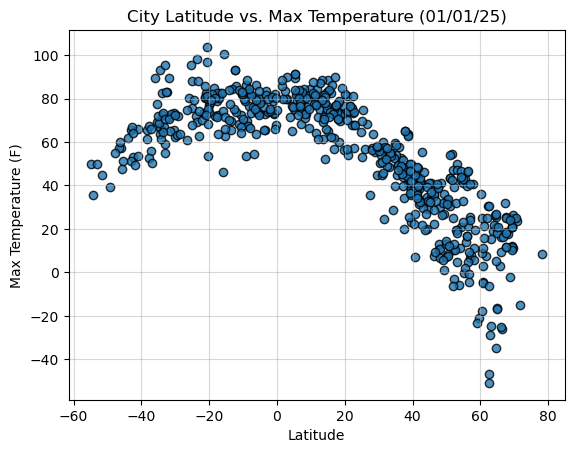

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True, alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

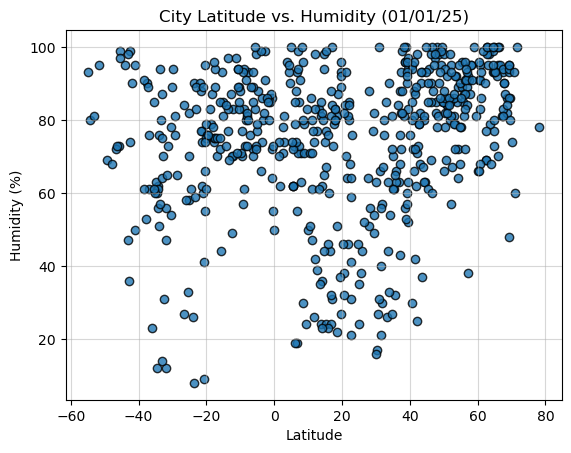

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True, alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

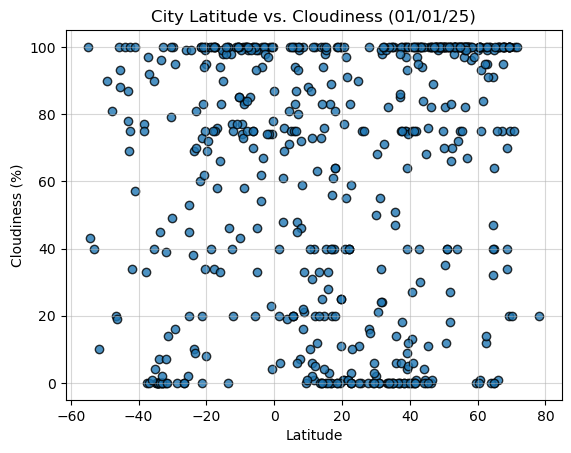

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True, alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

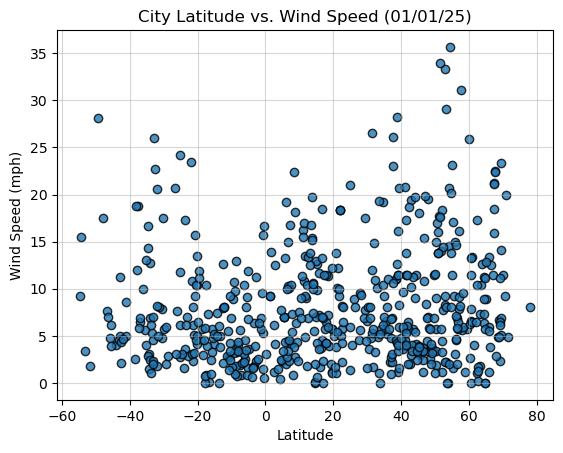

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True, alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,zhezqazghan,47.7833,67.7667,10.98,85,100,4.47,KZ,2025-01-01
3,bardai,11.6500,7.2333,64.22,26,1,13.51,NG,2025-01-01
5,lerwick,60.1545,-1.1494,36.18,66,99,25.86,GB,2025-01-01
6,bethel,41.3712,-73.4140,43.90,88,100,11.50,US,2025-01-01
7,georgetown,5.4112,100.3354,89.53,62,20,7.00,MY,2025-01-01


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,39.34,69,90,28.10,TF,2025-01-01
1,minas de marcona,-15.2119,-75.1103,62.62,85,98,4.09,PE,2025-01-01
4,adamstown,-25.0660,-130.1015,75.76,82,53,11.77,PN,2025-01-01
14,edinburgh of the seven seas,-37.0676,-12.3116,55.76,61,92,6.46,SH,2025-01-01
15,maposeni,-10.5833,35.4000,72.55,94,100,2.77,TZ,2025-01-01


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8758516384735442


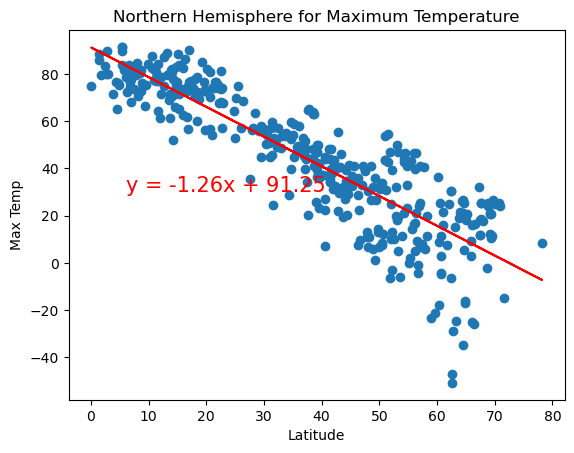

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title("Northern Hemisphere for Maximum Temperature")
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-squared is: 0.49750344917570355


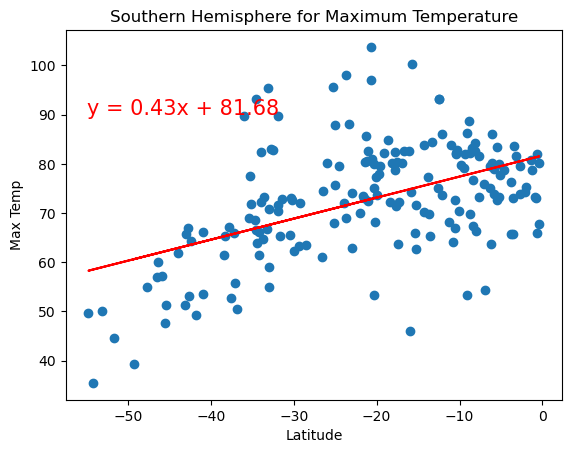

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title("Southern Hemisphere for Maximum Temperature")
plot_linear_regression(x_values, y_values, 'Max Temp',(-55,90))

**Discussion about the linear relationship:**
There is a fairly tight relationship with going north on the globe and temperature going down. Though an r^2 value of 0.95 is generally the one used in classes I took in school to accept a result. However, intuitively we know that this is true because we understand how the tilt of the earth affects the distance to the Sun, and that this has an effect on temperature as you go north.

What's interesting is that this relationship is not as tight in the Southern Hemisphere. My guess is that it's because the range of latitudes for the cities in the Southern half of the world are in a much tighter range of latitudes then the Northern Hemisphere. Probably we would have seen a stronger correlation if the latitude range was larger.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.37523119698374324


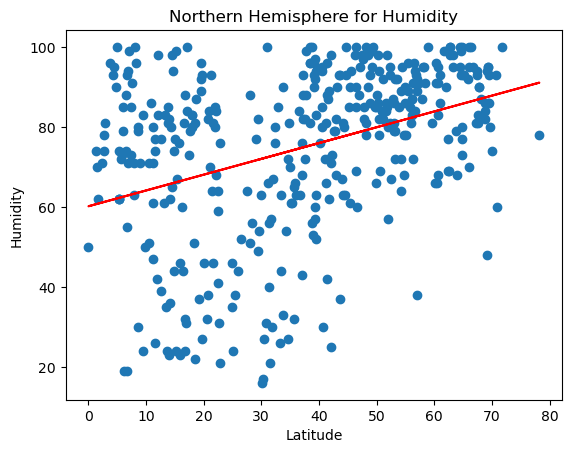

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title("Northern Hemisphere for Humidity")
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-squared is: 0.21462735198586425


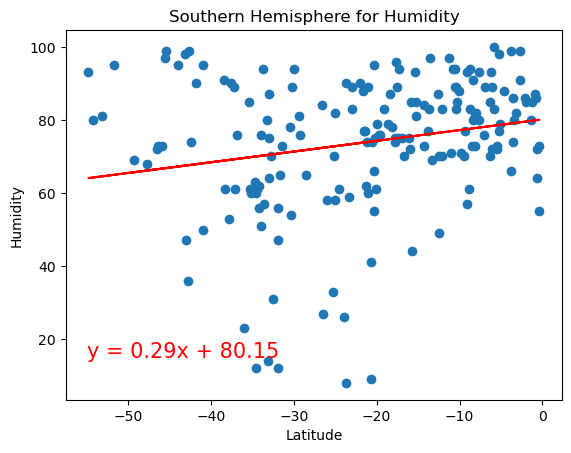

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title("Southern Hemisphere for Humidity")
plot_linear_regression(x_values, y_values, 'Humidity',(-55,15))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.3172370923185673


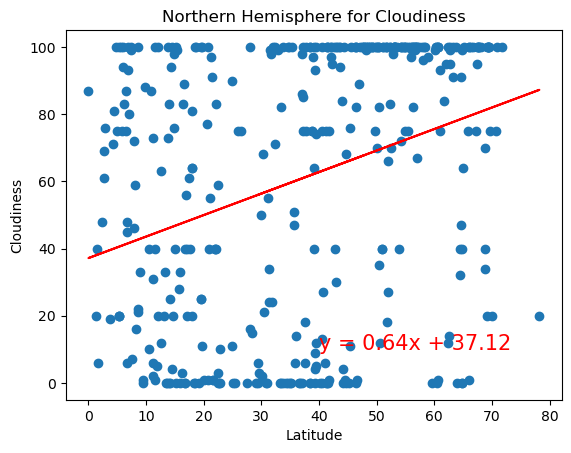

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title("Northern Hemisphere for Cloudiness")
plot_linear_regression(x_values, y_values, 'Cloudiness',(40,10))

The r-squared is: 0.3541920674376354


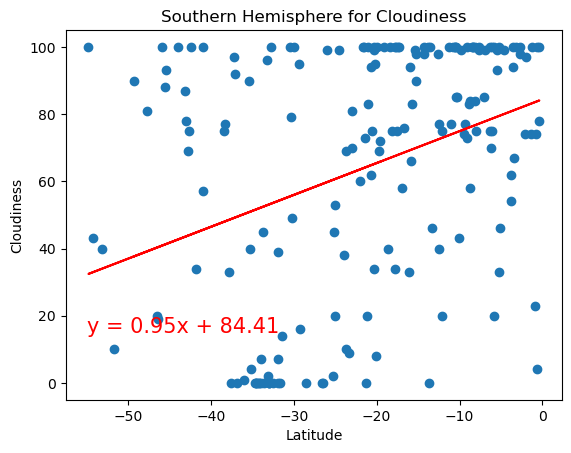

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title("Southern Hemisphere for Cloudiness")
plot_linear_regression(x_values, y_values, 'Cloudiness',(-55,15))

**Discussion about the linear relationship:** 
There is not a very strong correlation with latitude and cloudiness in either hemisphere. I do not understand the science behind cloud formation so I have no idea why this would be so.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.1041983841103799


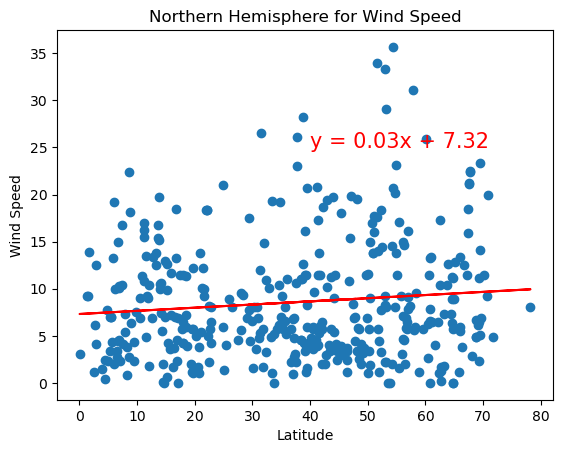

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Northern Hemisphere for Wind Speed")
plot_linear_regression(x_values, y_values, 'Wind Speed',(40,25))

The r-squared is: -0.24803877454794107


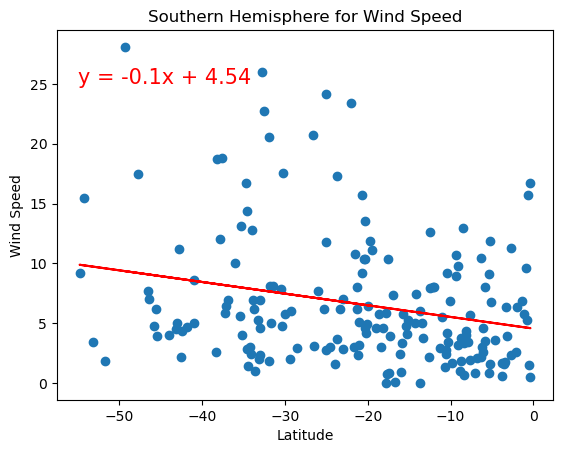

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Southern Hemisphere for Wind Speed")
plot_linear_regression(x_values, y_values, 'Wind Speed',(-55,25))

**Discussion about the linear relationship:**
There is not a very strong correlation with latitude and wind speed in either hemisphere. I do not understand the science behind wind speed so I have no idea why this would be so.